# Imports

In [1]:
from PIL import Image
from numpy import asarray
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

from keras.layers.core import Flatten
from keras.layers.convolutional import *
from keras.layers.pooling import *

# Sample image

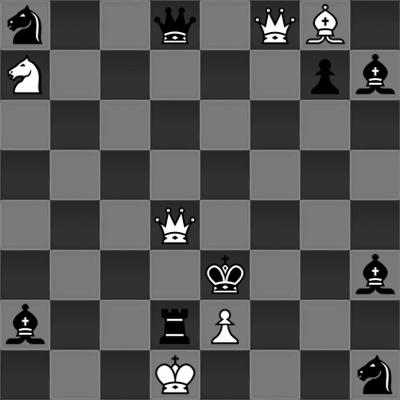

In [2]:
directory = '/kaggle/input/chess-positions/train'
file_list = os.listdir(directory)
Image.open(directory + "/" + file_list[0]).convert('L')

# Sample FEN

In [3]:
file_list[0]

'n2q1QB1-N5pb-8-8-3Q4-4k2b-b2rP3-3K3n.jpeg'

# Encode-decode dictionary

In [4]:
Enc_Dict = {
    'K':1,
    'Q':2,
    'B':3,
    'N':4,
    'R':5,
    'P':6,
    'k':7,
    'q':8,
    'b':9,
    'n':10,
    'r':11,
    'p':12,
    ' ':0
}
Dec_Dict = {
    1:'K',
    2:'Q',
    3:'B',
    4:'N',
    5:'R',
    6:'P',
    7:'k',
    8:'q',
    9:'b',
    10:'n',
    11:'r',
    12:'p',
    0:' '
}

# FEN to List conversion

In [5]:
def FEN_to_List(FEN, Y):
    for row in FEN.split('-'):
        for i in range(len(row)):
            if row[i].isnumeric():
                Y.extend([Enc_Dict[' ']] * int(row[i]))
            else:
                Y.append(Enc_Dict[row[i]])

# Creating training-data

In [6]:
X_list = []
Y_list = []

current = 1
Ntrain = 1000
for file in file_list:
    image = Image.open(directory + "/" + file).convert('L')
    
    # 64 block will be appended in X
    for y in range(0,400,50):
        for x in range(0,400,50):
            X_list.append([asarray(image.crop((x, y, x+50, y+50)))])
    
    # 64 char will be appended
    FEN_to_List(file[:-5],Y_list)
    
    # exit condition
    if current == Ntrain:
        break
    else:
        current += 1

X = np.concatenate( X_list, axis=0 )
Y = np.array(Y_list)

In [7]:
Y.shape

(64000,)

In [8]:
X = X.reshape(X.shape[0],50,50,1)
X.shape

(64000, 50, 50, 1)

# Sequential model

In [9]:
model = Sequential(
    [
        Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(50,50,1)),
        MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"),
        Conv2D(filters=64, kernel_size=(5, 5), padding="same", activation="relu"),
        Flatten(),
        Dense(units=13, activation='softmax')
    ]
)

2022-01-24 10:12:20.602106: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-24 10:12:20.732440: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-24 10:12:20.733611: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-24 10:12:20.735349: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        51264     
_________________________________________________________________
flatten (Flatten)            (None, 40000)             0         
_________________________________________________________________
dense (Dense)                (None, 13)                520013    
Total params: 571,597
Trainable params: 571,597
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Shuffling data

In [12]:
X, Y = shuffle(X, Y, random_state=0)

# Fitting data to model

In [13]:
model.fit(x=X, y=Y, batch_size=64, validation_split=0.2,epochs=10, shuffle=False, verbose=2)

2022-01-24 10:12:24.077899: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-01-24 10:12:25.736017: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


800/800 - 11s - loss: 0.7056 - accuracy: 0.9726 - val_loss: 0.0208 - val_accuracy: 0.9930
Epoch 2/10
800/800 - 3s - loss: 0.0201 - accuracy: 0.9947 - val_loss: 0.0272 - val_accuracy: 0.9929
Epoch 3/10
800/800 - 3s - loss: 0.0119 - accuracy: 0.9971 - val_loss: 0.0140 - val_accuracy: 0.9962
Epoch 4/10
800/800 - 3s - loss: 0.0098 - accuracy: 0.9975 - val_loss: 0.0085 - val_accuracy: 0.9976
Epoch 5/10
800/800 - 3s - loss: 0.0101 - accuracy: 0.9975 - val_loss: 0.0212 - val_accuracy: 0.9937
Epoch 6/10
800/800 - 3s - loss: 0.0062 - accuracy: 0.9983 - val_loss: 0.0051 - val_accuracy: 0.9987
Epoch 7/10
800/800 - 3s - loss: 0.0048 - accuracy: 0.9988 - val_loss: 0.0124 - val_accuracy: 0.9968
Epoch 8/10
800/800 - 3s - loss: 0.0091 - accuracy: 0.9977 - val_loss: 0.0025 - val_accuracy: 0.9991
Epoch 9/10
800/800 - 3s - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.0175 - val_accuracy: 0.9955
Epoch 10/10
800/800 - 3s - loss: 0.0042 - accuracy: 0.9990 - val_loss: 0.0125 - val_accuracy: 0.9973


# Test image

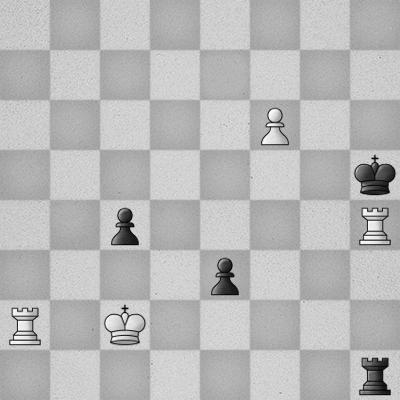

In [14]:
directory = '/kaggle/input/chess-positions/test'
file_list = os.listdir(directory)
test_index = 100
Image.open(directory + "/" + file_list[test_index]).convert('L')

# Test output

In [15]:
X_list = []
image = Image.open(directory + "/" + file_list[test_index]).convert('L')
for y in range(0,400,50):
    for x in range(0,400,50):
        X_list.append([asarray(image.crop((x, y, x+50, y+50)))])
X = np.concatenate( X_list, axis=0 )
X = X.reshape(X.shape[0],50,50,1)
test_prediction = model.predict(X)
test_prediction = np.argmax(test_prediction, axis=-1)
answer = []
for x in test_prediction:
    answer.append(Dec_Dict[x])

for i in range(64):
    print('|'+ answer[i] + '|',end='  ')
    if ((i+1) % 8) == 0:
        print()
        print('---------------------------------------')

| |  | |  | |  | |  | |  | |  | |  | |  
---------------------------------------
| |  | |  | |  | |  | |  | |  | |  | |  
---------------------------------------
| |  | |  | |  | |  | |  |P|  | |  | |  
---------------------------------------
| |  | |  | |  | |  | |  | |  | |  |k|  
---------------------------------------
| |  | |  |p|  | |  | |  | |  | |  |R|  
---------------------------------------
| |  | |  | |  | |  |p|  | |  | |  | |  
---------------------------------------
|R|  | |  |K|  | |  | |  | |  | |  | |  
---------------------------------------
| |  | |  | |  | |  | |  | |  | |  |r|  
---------------------------------------
